In [141]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

In [142]:
#Define paths to model files 
import os 
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [144]:
#load the datasheet 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers
import pandas as pd
#path='/content/drive/My Drive/Colab Notebooks/downloads/edited_UTC.xlsx'
#path = '/content/malaysia_Dataset.xlsx'
path = '/content/trialaa.xlsx'
df = pd.read_excel(path)

In [145]:
#data shuffling 
df = df.sample(frac = 1)
print(df)

                     created_at  entry_id  Temperature   Humidity    Pressure  \
1028  2022-04-02T19:01:00+00:00      2976        33.25   62.56934  1003.34015   
1228  2022-04-14T13:01:42+00:00      8160        30.80   97.31738   997.52460   
422   2022-04-08T20:00:03+00:00      5132        28.52  100.00000  1003.88940   
7     2022-03-14T20:03:07+00:00        23        27.48  100.00000  1000.53937   
175   2022-03-22T11:09:26+00:00       623        31.75   77.30371  1000.41888   
...                         ...       ...          ...        ...         ...   
166   2022-03-22T02:08:13+00:00       591        34.98   61.93457  1005.72906   
1039  2022-04-03T06:01:17+00:00      3256        36.99   48.14941  1003.10297   
179   2022-03-22T15:09:51+00:00       637        30.35   87.68848  1003.92267   
1257  2022-04-15T18:01:24+00:00      8978        30.00  100.00000   997.88403   
145   2022-03-21T05:05:39+00:00       514        33.88   63.24121  1003.45697   

       Altitude   UV  SHT31

In [146]:
x = df[["Temperature","Humidity","Pressure"]]
y = df["Openweathermap_TEMP"]

In [147]:
#create scaler 
scaler = MinMaxScaler(feature_range = (-1,1))

In [148]:
#DATA PREPROCESSING 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 13)
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [149]:
#split dataset into train and test 
# datasplitting in the normal way 
nsamples = 1393    # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.3   # Percentage of samples that should be held for test set

# sPlit the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x, [val_split, test_split])
y_val, y_test, y_train = np.split(y, [val_split, test_split])

In [150]:
scaled_x_val = scaler.fit_transform(x_val)
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [151]:
#reshaping coz got only 1D array
y_train = np.array([y_train]).reshape(-1,1)
y_test = np.array([y_test]).reshape(-1,1)
y_val = np.array([y_val]).reshape(-1,1)

In [152]:
scaled_y_train = scaler.fit_transform(y_train)
scaled_y_test = scaler.fit_transform(y_test)
scaled_y_val  = scaler.fit_transform(y_val)

In [153]:
#Sequential model
#define a model 
#model = Sequential()
#model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(1, activation='linear'))
# Create a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from keras.layers import Dense, Conv1D, Conv2D, Flatten

model= Sequential([Dense(50,activation='selu',input_shape=[3]),
                        Dense(25,activation='selu'),
                        Dropout(0.2),
                        Dense(25,activation='selu'),
                        Dense(1)
                       ])

In [154]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                200       
                                                                 
 dense_25 (Dense)            (None, 25)                1275      
                                                                 
 dropout_6 (Dropout)         (None, 25)                0         
                                                                 
 dense_26 (Dense)            (None, 25)                650       
                                                                 
 dense_27 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,151
Trainable params: 2,151
Non-trainable params: 0
_________________________________________________________________


In [155]:
from tensorflow.keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping

In [156]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])

In [157]:
#history = model.fit(scaled_x_train, scaled_y_train, validation_data=(scaled_x_val,scaled_y_val), epochs=3000, verbose=0)
history = model.fit(scaled_x_train, scaled_y_train, validation_split = 0.2, epochs=1000, verbose=0)

#Save the model to disk 
#model.save(MODEL_TF)

In [158]:
#Evaluate the model 
#evalue the keras model 
#loss, accuracy = model.evaluate(scaled_x_test,scaled_y_test, verbose = 0)
#print('Model Loss: %.2f,Accuracy: %.2f' % ((loss*100), (accuracy *100)))

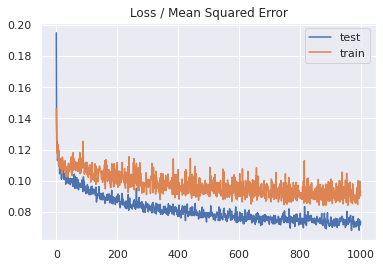

In [159]:
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='test')
pyplot.plot(history.history['val_loss'], label='train')
pyplot.legend()
pyplot.show()

In [160]:
pred = model.predict(scaled_x_test).reshape(-1,1)

Text(0, 0.5, 'Predictions')

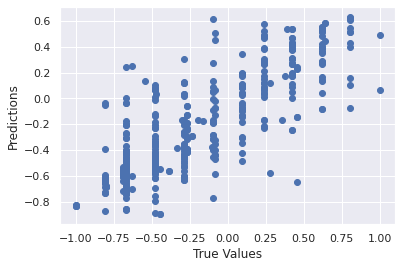

In [161]:
# Plot predictions against actual values
#predictions = model.predict(scaled_x_test)

#plt.clf()
#plt.title("Comparison of predictions to actual values")
#plt.plot(scaled_x_test, scaled_y_test, 'b.', label='Actual')
#plt.plot(scaled_x_test, pred, 'r.', label='Prediction')
#plt.legend()
#plt.show()

y_pred = model.predict(scaled_x_test)
plt.scatter(scaled_y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [162]:
prediction = model.predict(scaled_x_test)

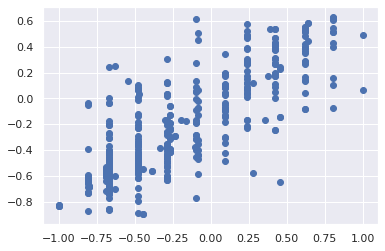

In [163]:
plt.scatter(scaled_y_test, prediction)

In [164]:
prediction= np.array([prediction]).reshape(-1,1)

Text(0, 0.5, 'Predictions')

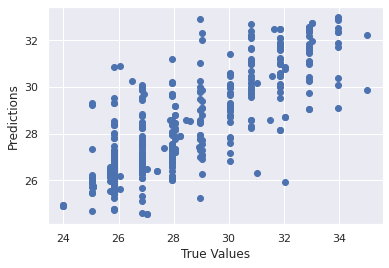

In [165]:
#Inverse transform 
# inversed = scaler.inverse_transform(scaled)

inv_x_test = scaler.inverse_transform(prediction)
inv_y_test = scaler.inverse_transform(scaled_y_test)
plt.scatter(inv_y_test, inv_x_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')

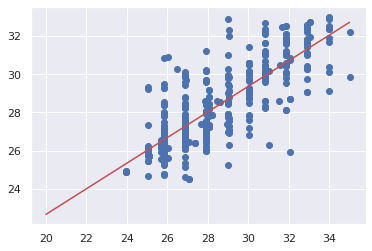

In [166]:
#using Scikit-Learn's LinearRegression estimator to fit this data and construct the best fit line
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns; sns.set()

model1 = LinearRegression(fit_intercept = True)

model1.fit(inv_y_test, inv_x_test)
xfit = np.linspace(20,35,1000)
yfit = model1.predict(xfit[:,np.newaxis])

plt.scatter(inv_y_test, inv_x_test)
plt.plot(xfit, yfit,'r')